In [ ]:
import pandas as pd

In [ ]:
tabela=pd.read_csv("/content/tabela_unica.csv", sep=',')

In [33]:
tabela = pd.read_csv("/content/tabela_unica.csv", sep=',', header=None)

In [34]:
tabela

,0,1,2,3,4,5,6
0,2022,1,40,29000,Mobi,1,Fiat
1,2022,1,2,49000,argo,1,Fiat
2,2022,1,3,19000,Uno,1,Fiat
3,2022,2,35,35000,Up,2,Volkswagen
4,2022,3,42,32000,Picanto,3,Kia
...,...,...,...,...,...,...,...
127,2022,7,5,280000,Pajero,7,Mitsubishi
128,2022,8,12,360000,Forester,8,Subaru
129,2022,3,2,45000,Cerato,3,Kia
130,2022,10,1,12000,J2,10,JaC Motors


In [27]:
tabela = tabela.drop(5, axis=1)

In [35]:
tabela.drop(5, axis=1, inplace=True)

In [36]:
tabela

,0,1,2,3,4,6
0,2022,1,40,29000,Mobi,Fiat
1,2022,1,2,49000,argo,Fiat
2,2022,1,3,19000,Uno,Fiat
3,2022,2,35,35000,Up,Volkswagen
4,2022,3,42,32000,Picanto,Kia
...,...,...,...,...,...,...
127,2022,7,5,280000,Pajero,Mitsubishi
128,2022,8,12,360000,Forester,Subaru
129,2022,3,2,45000,Cerato,Kia
130,2022,10,1,12000,J2,JaC Motors


In [43]:
header_names = ["data", "id_marca", "vendas","valor_veiculo", "nome", "apagar", "marca"]
tabela = pd.read_csv("/content/tabela_unica.csv", names=header_names)

In [44]:
tabela

,data,id_marca,vendas,valor_veiculo,nome,apagar,marca
0,2022,1,40,29000,Mobi,1,Fiat
1,2022,1,2,49000,argo,1,Fiat
2,2022,1,3,19000,Uno,1,Fiat
3,2022,2,35,35000,Up,2,Volkswagen
4,2022,3,42,32000,Picanto,3,Kia
...,...,...,...,...,...,...,...
127,2022,7,5,280000,Pajero,7,Mitsubishi
128,2022,8,12,360000,Forester,8,Subaru
129,2022,3,2,45000,Cerato,3,Kia
130,2022,10,1,12000,J2,10,JaC Motors


In [45]:
tabela.drop("apagar", axis=1, inplace=True)

In [46]:
tabela

,data,id_marca,vendas,valor_veiculo,nome,marca
0,2022,1,40,29000,Mobi,Fiat
1,2022,1,2,49000,argo,Fiat
2,2022,1,3,19000,Uno,Fiat
3,2022,2,35,35000,Up,Volkswagen
4,2022,3,42,32000,Picanto,Kia
...,...,...,...,...,...,...
127,2022,7,5,280000,Pajero,Mitsubishi
128,2022,8,12,360000,Forester,Subaru
129,2022,3,2,45000,Cerato,Kia
130,2022,10,1,12000,J2,JaC Motors


In [47]:
marca_maior_volume = tabela.groupby('marca')['vendas'].sum().idxmax()
volume_maior = tabela.groupby('marca')['vendas'].sum().max()
print(f"1. A marca com o maior volume de vendas é '{marca_maior_volume}' com um total de {volume_maior} unidades vendidas.")


1. A marca com o maior volume de vendas é 'Fiat' com um total de 433 unidades vendidas.


In [48]:
import matplotlib.pyplot as plt

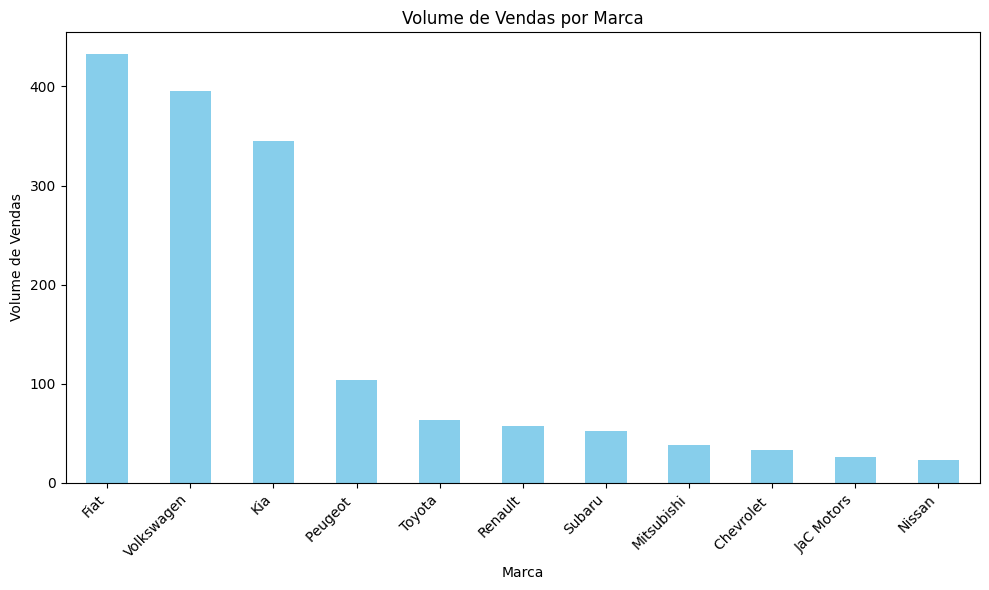

In [49]:
volume_por_marca = tabela.groupby('marca')['vendas'].sum().sort_values(ascending=False)

#gráfico de barras
plt.figure(figsize=(10, 6))
volume_por_marca.plot(kind='bar', color='skyblue')
plt.title('Volume de Vendas por Marca')
plt.xlabel('Marca')
plt.ylabel('Volume de Vendas')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [50]:
veiculo_maior_receita = tabela.loc[tabela['valor_veiculo'].idxmax(), 'nome']
receita_maior = tabela['valor_veiculo'].max()
print(f"2. O veículo que gerou a maior receita é '{veiculo_maior_receita}' com uma receita de R${receita_maior}.")

2. O veículo que gerou a maior receita é 'Forester' com uma receita de R$360000.


In [53]:
veiculo_menor_receita = tabela.loc[tabela['valor_veiculo'].idxmin(), 'nome']
receita_menor = tabela['valor_veiculo'].min()
print(f"2. O veículo que gerou a menor receita é '{veiculo_menor_receita}' com uma receita de R${receita_menor}.")


2. O veículo que gerou a menor receita é 'Palio' com uma receita de R$8000.


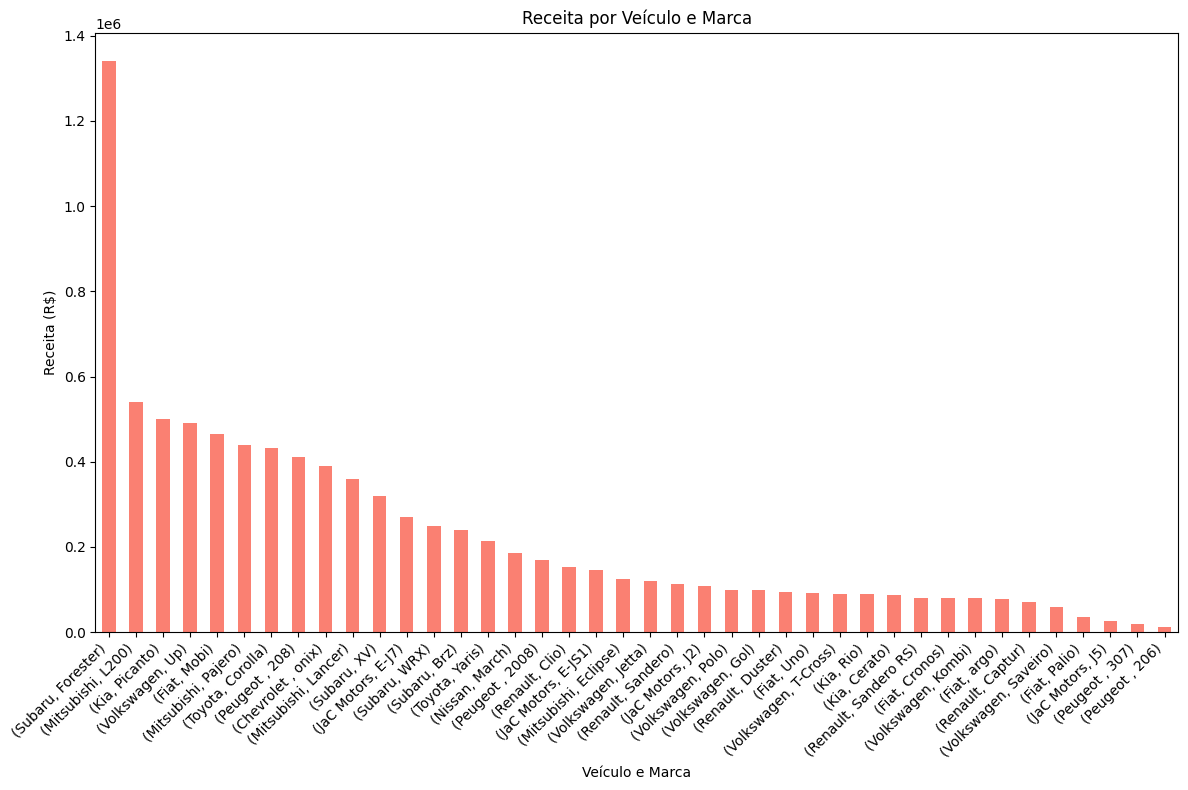

In [52]:
receita_por_veiculo = tabela.groupby(['marca', 'nome'])['valor_veiculo'].sum().sort_values(ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
receita_por_veiculo.plot(kind='bar', color='salmon')
plt.title('Receita por Veículo e Marca')
plt.xlabel('Veículo e Marca')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

<ipython-input-54-3528aa473cb4>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

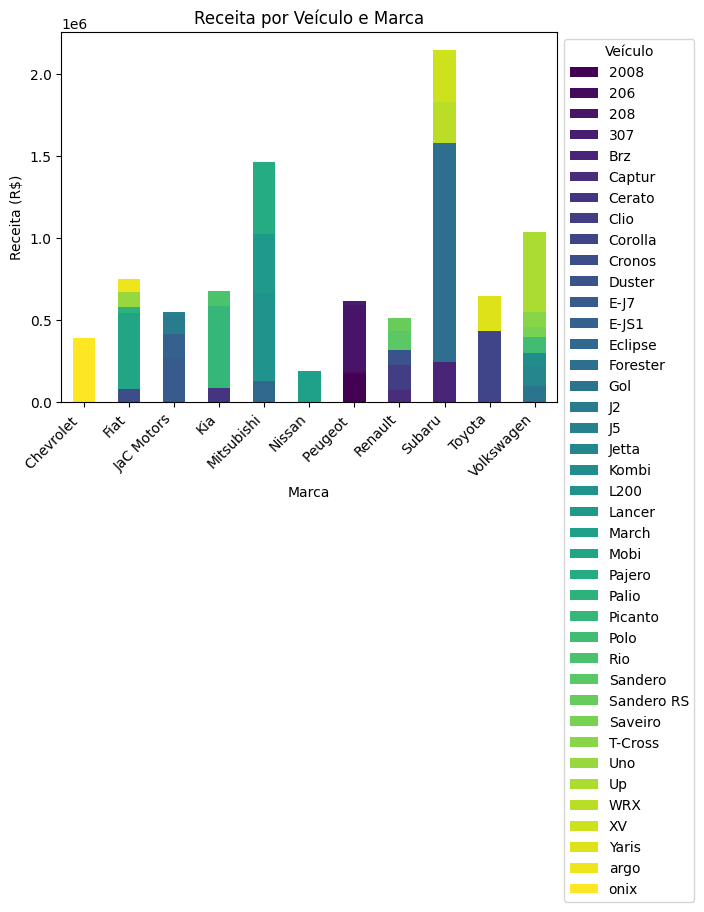

In [54]:
receita_por_veiculo_marca = tabela.groupby(['marca', 'nome'])['valor_veiculo'].sum().unstack()

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 8))
receita_por_veiculo_marca.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Receita por Veículo e Marca')
plt.xlabel('Marca')
plt.ylabel('Receita (R$)')
plt.xticks(rotation=45, ha='right')

# Adicionar legenda
plt.legend(title='Veículo', bbox_to_anchor=(1, 1))

# Exibir o gráfico
plt.tight_layout()
plt.show()

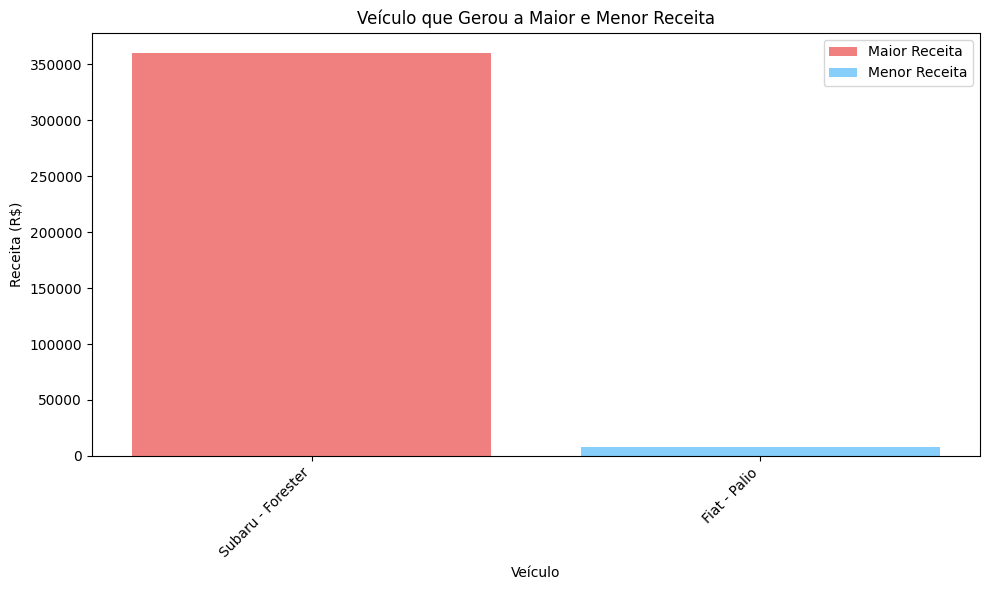

In [55]:

veiculo_maior_receita = tabela.loc[tabela['valor_veiculo'].idxmax(), ['marca', 'nome', 'valor_veiculo']]
veiculo_menor_receita = tabela.loc[tabela['valor_veiculo'].idxmin(), ['marca', 'nome', 'valor_veiculo']]

plt.figure(figsize=(10, 6))

plt.bar(f"{veiculo_maior_receita['marca']} - {veiculo_maior_receita['nome']}", veiculo_maior_receita['valor_veiculo'], color='lightcoral', label='Maior Receita')
plt.bar(f"{veiculo_menor_receita['marca']} - {veiculo_menor_receita['nome']}", veiculo_menor_receita['valor_veiculo'], color='lightskyblue', label='Menor Receita')

plt.title('Veículo que Gerou a Maior e Menor Receita')
plt.xlabel('Veículo')
plt.ylabel('Receita (R$)')
plt.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
receita_vendas_por_marca = tabela.groupby('marca').agg({'valor_veiculo': 'sum', 'vendas': 'sum'}).reset_index()

# Calcular a receita por venda (receita total / número total de vendas)
receita_vendas_por_marca['receita_por_venda'] = receita_vendas_por_marca['valor_veiculo'] / receita_vendas_por_marca['vendas']

# Encontrar a marca com a maior receita por venda
marca_maior_receita_por_venda = receita_vendas_por_marca.loc[receita_vendas_por_marca['receita_por_venda'].idxmax(), 'marca']

# Visualizar a tabela com receita, vendas e receita por venda
print("4. Receita, Vendas e Receita por Venda por Marca:")
print(receita_vendas_por_marca)

print(f"A marca que gerou a maior receita com número menor de vendas é '{marca_maior_receita_por_venda}'.")

4. Receita, Vendas e Receita por Venda por Marca:
         marca  valor_veiculo  vendas  receita_por_venda
0   Chevrolet          390200      33       11824.242424
1         Fiat         747000     433        1725.173210
2   JaC Motors         549000      26       21115.384615
3          Kia         676000     345        1959.420290
4   Mitsubishi        1464000      38       38526.315789
5       Nissan         185000      23        8043.478261
6     Peugeot          613000     104        5894.230769
7      Renault         512000      57        8982.456140
8       Subaru        2150000      52       41346.153846
9       Toyota         647000      63       10269.841270
10  Volkswagen        1039000     395        2630.379747
A marca que gerou a maior receita com número menor de vendas é 'Subaru'.


In [62]:
total_vendas_por_veiculo = tabela.groupby('nome')['vendas'].sum().reset_index()

total_vendas_por_veiculo = total_vendas_por_veiculo.sort_values(by='vendas', ascending=False)

print("5. Quantidade Total de Vendas por Veículo:")
print(total_vendas_por_veiculo)

5. Quantidade Total de Vendas por Veículo:
          nome  vendas
23        Mobi     414
34          Up     373
26     Picanto     338
2          208      90
8      Corolla      40
39        onix      33
7         Clio      30
14    Forester      28
37       Yaris      23
22       March      23
35         WRX      15
16          J2      14
21      Lancer      14
24      Pajero      13
10      Duster      11
20        L200      10
15         Gol       9
29     Sandero       8
33         Uno       8
0         2008       7
1          206       6
31     Saveiro       6
12       E-JS1       6
6       Cerato       6
4          Brz       5
17          J5       5
5       Captur       5
38        argo       4
9       Cronos       4
36          XV       4
30  Sandero RS       3
19       Kombi       3
25       Palio       3
32     T-Cross       2
13     Eclipse       1
18       Jetta       1
27        Polo       1
3          307       1
11        E-J7       1
28         Rio       1


Média de Vendas por Marca:
         marca     vendas
0   Chevrolet    3.666667
1         Fiat  19.681818
2   JaC Motors   2.166667
3          Kia  23.000000
4   Mitsubishi   3.800000
5       Nissan   3.285714
6     Peugeot   11.555556
7      Renault   4.750000
8       Subaru   7.428571
9       Toyota   7.875000
10  Volkswagen  18.809524


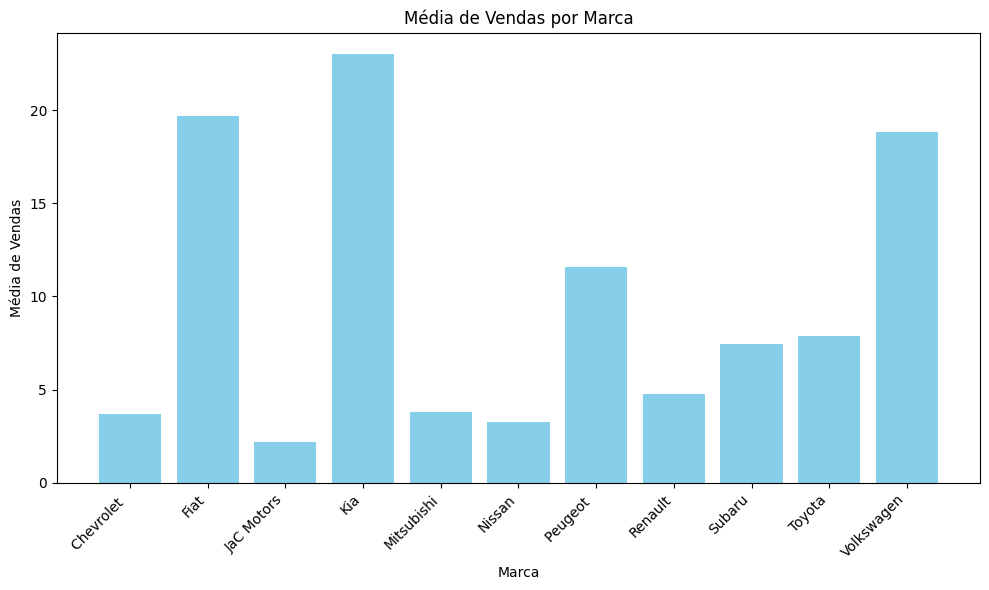

In [63]:
media_vendas_por_marca = tabela.groupby('marca')['vendas'].mean().reset_index()

# Visualizar a tabela com as médias de vendas por marca
print("Média de Vendas por Marca:")
print(media_vendas_por_marca)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_vendas_por_marca['marca'], media_vendas_por_marca['vendas'], color='skyblue')
plt.title('Média de Vendas por Marca')
plt.xlabel('Marca')
plt.ylabel('Média de Vendas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()